# Notebook Description

In this notebook, we test the proposed Ansatz for a superposition of the single-rotor wavefunction, i.e.
\begin{equation}
    \varphi_{i,j} \rightarrow \cos\frac{\theta}{2} \varphi_{i,j}^{\text{FO}} + \sin\frac{\theta}{2} e^{-i\varphi}\varphi_{i,j}^{\text{FDv}}
\end{equation}
with variational parameters $\theta$ and $\varphi$. In principle we show that it doesn't improve the GS energy. More detailed arguments can be found in the accompanying notes. 

In [87]:
import numpy as np
import scipy 

import matplotlib.pyplot as plt

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

In [2]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))


### Create Param Object and read reference configuration

In [3]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"converge_new_lattice": "no",
"My": 6,
"B": 1.0,
"tx": 90,
"ty": 100,
"V_0": 90.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 11,
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

x = (2*np.pi/params["n"])*np.arange(params["n"])

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

B = params["B"]

scale = B 

exc_number = params["excitation_no"]

q = np.array([0,0])

coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)
mult_ref_object = diag_heff.multi_ref_ci(params=params)

### Preparation of the reference states

Iter = 0 , Overlap = (0.9471710200034617+4.5093954396541485e-13j)
Iter = 1 , Overlap = (0.992797823602701+7.729280836936154e-14j)
Iter = 2 , Overlap = (0.9973885110534767+3.5410336953095795e-14j)
Iter = 3 , Overlap = (0.9987032756154135+2.528241947147137e-14j)
Iter = 4 , Overlap = (0.9992851265218974+1.9843614801960376e-14j)
Iter = 5 , Overlap = (0.9995833809916318+1.6425897322588508e-14j)
Iter = 6 , Overlap = (0.9997366614651031+1.3738943266743471e-14j)
Iter = 7 , Overlap = (0.999827811513271+1.1704593438020986e-14j)
Iter = 8 , Overlap = (0.999875024794295+9.997954037418496e-15j)
Iter = 9 , Overlap = (0.9999058403579534+8.626584127901627e-15j)
Iter = 0 , Overlap = (0.9358697999499579+3.808884828594283e-13j)
Iter = 1 , Overlap = (0.9736275204477806+5.303135849633562e-14j)
Iter = 2 , Overlap = (0.9880370010418544+1.39179980442452e-14j)
Iter = 3 , Overlap = (0.9894950010533224+4.376751852140522e-15j)
Iter = 4 , Overlap = (0.9916362337739969-4.201548456184582e-15j)
Iter = 5 , Overlap = (0

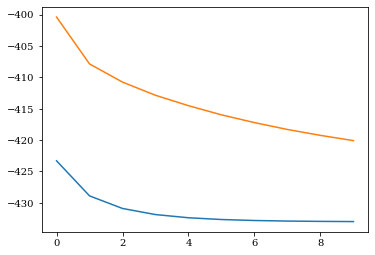

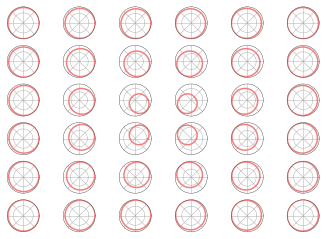

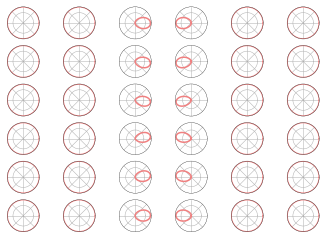

In [10]:
sigma_gauss = 1

mult_ref_object.set_phase_bool = True

diag_object.sigma_gaussian = sigma_gauss

psi = (1/n**0.5)*np.ones((My,Mx,n), dtype=complex) # uniform
psi_v = diag_object.apply_fdv_bias_coefficients(psi)

q = np.array([0,0])

iter_number = 10

gs_fo, conv_energ_gs_fo, overlap_arr_fo = mult_ref_object.creat_new_ref_state(iter_number, psi, q)
gs_fd, conv_energ_gs_fd, overlap_arr_fd = mult_ref_object.creat_new_ref_state(iter_number, psi_v, q)

print('\nE(FO) = ', conv_energ_gs_fo[-1])
print('E(FD) = ', conv_energ_gs_fd[-1])

plt.plot(conv_energ_gs_fo.real)
plt.plot(conv_energ_gs_fd.real)

plot_rotor_wavefunction(x, My, Mx, np.abs(gs_fo)**2)
plot_rotor_wavefunction(x, My, Mx, np.abs(gs_fd)**2)

Comparison between core rotor wavefunction

In [19]:
def single_rotor_overlap(psi1, psi2):
    psi1conj = np.conjugate(psi1).copy()
    psi2c = psi2.copy()
    return np.sum(psi1conj*psi2c)

def gram_schmidt(psi1, psi2):
    psi1c = psi1.copy()
    psi2c = psi2.copy()

    psi1_gramsch = psi1c.copy()
    psi2_gramsch = psi2 - (single_rotor_overlap(psi1c, psi2c)/single_rotor_overlap(psi1c, psi1c))*psi1c 
    return psi1_gramsch, psi2_gramsch

Overlap <FO|FDv> = (0.7904500205618517+9.185673950913304e-14j)


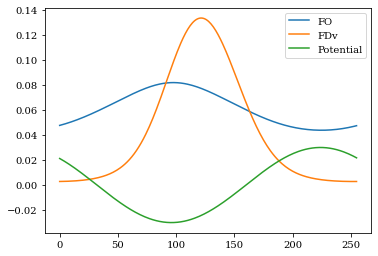

In [35]:
pot = np.cos(x+np.pi/4)

psi1 = gs_fo[0,0]
psi2 = gs_fd[0,0]

overlap_fo_fd = single_rotor_overlap(psi1, psi2)
print('Overlap <FO|FDv> =', overlap_fo_fd)

plt.plot(psi1.real, label=r'FO')
plt.plot(psi2.real, label=r'FDv')
plt.plot(0.03*pot, label=r'Potential')
plt.legend()

Apply the Gram-Schmidt procedure

Overlap <FO|tilde{FDv}> = 7.888609052210118e-30j


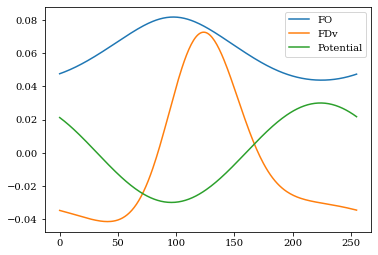

In [36]:
psi1_gs, psi2_gs = gram_schmidt(psi1, psi2)

overlap_fo_fd_gs_test = single_rotor_overlap(psi1_gs, psi2_gs)
print('Overlap <FO|tilde{FDv}> =', overlap_fo_fd_gs_test)

plt.plot(psi1_gs.real, label=r'FO')
plt.plot(psi2_gs.real, label=r'FDv')
plt.plot(0.03*pot, label=r'Potential')
plt.legend()

### Interaction Terms

In [37]:
def pot_energy(pot, psi1, psi2):
    psi1conj = np.conjugate(psi1).copy()
    psi2c = psi2.copy()

    E = np.sum(pot*psi1conj*psi2c)
    return E

In [38]:
E_11_FO_1 = pot_energy(pot, psi1, psi1)
E_11_FD_1 = pot_energy(pot, psi2, psi2)
E_11_FO_FD_1 = pot_energy(pot, psi1, psi2)

print('\Before Gram-Schmidt:')
print('E_int(FO) =', E_11_FO_1)
print('E_int(FD) =', E_11_FD_1)
print('E_int(FO/FD) =', E_11_FO_FD_1)

E_11_FO_2 = pot_energy(pot, psi1_gs, psi1_gs)
E_11_FD_2 = pot_energy(pot, psi2_gs, psi2_gs)
E_11_FO_FD_2 = pot_energy(pot, psi1_gs, psi2_gs)

print('\nAfter Gram-Schmidt:')
print('E_int(FO) =', E_11_FO_2)
print('E_int(FD) =', E_11_FD_2)
print('E_int(FO/FD) =', E_11_FO_FD_2)

\Before Gram-Schmidt:
E_int(FO) = (-0.29731108404851797+4.7088987140267917e-32j)
E_int(FD) = (-0.6783732798262001+7.93766008048123e-31j)
E_int(FO/FD) = (-0.4819976899060602-5.3868657485572107e-14j)

After Gram-Schmidt:
E_int(FO) = (-0.29731108404851797+4.7088987140267917e-32j)
E_int(FD) = (-0.10214641763757579+9.381686241596323e-32j)
E_int(FO/FD) = (-0.24698813740664283-2.6558630684949446e-14j)


ind/theta min = [38] 1.2058638468324459


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


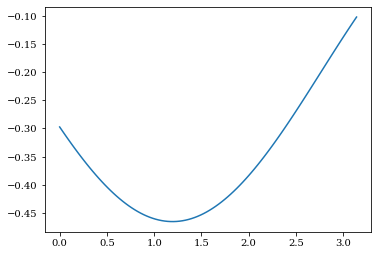

In [52]:
theta_grid = np.linspace(0,np.pi,100)

E_int_11_theta = np.cos(theta_grid/2)**2*E_11_FO_2 + np.sin(theta_grid/2)**2*E_11_FD_2 + 2*np.cos(theta_grid/2)*np.sin(theta_grid/2)*E_11_FO_FD_2

min_index = np.where(E_int_11_theta == np.min(E_int_11_theta))[0]
theta_min = theta_grid[min_index][0]
print('ind/theta min =', min_index, theta_min)

plt.plot(theta_grid, E_int_11_theta)

In [73]:
def gram_schmidt_total_wf(psi1, psi2):
    psi1c = psi1.copy()
    psi2c = psi2.copy()

    psi1_gramsch = np.zeros(psi1c.shape, dtype=complex)
    psi2_gramsch = np.zeros(psi2c.shape, dtype=complex)
    for i in range(My):
        for j in range(Mx):
            psi1_gs_ij, psi2_gs_ij = gram_schmidt(psi1c[i,j], psi2c[i,j])
            
            psi1_gramsch[i,j] = psi1_gs_ij
            psi2_gramsch[i,j] = psi2_gs_ij

    return psi1_gramsch, psi2_gramsch

def construct_new_state(psi1, psi2, theta):
    psi1c = psi1.copy()
    psi2c = psi2.copy()

    psin = np.zeros(psi1c.shape, dtype=complex)
    for i in range(My):
        for j in range(Mx):
            psin[i,j] = np.cos(theta/2)*psi1c[i,j] + np.sin(theta/2)*psi2c[i,j]
            norm2 = np.sum(np.abs(psin[i,j])**2)
            psin[i,j] = 1/(norm2**0.5)*psin[i,j]
        
    return psin

E FO = (-432.97917676478096-9.569296478377715e-19j)
E FD = (-420.08262576586475+7.311110735565862e-18j)
E new = (-389.2953271760207-1.1224081435056723e-17j)


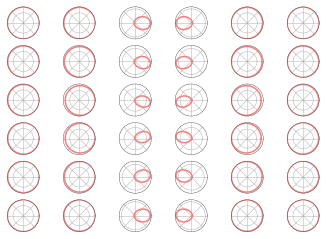

In [88]:
psi1_total_gs, psi2_total_gs = gram_schmidt_total_wf(gs_fo, gs_fd)
new_var_state = construct_new_state(gs_fo, psi2_total_gs, theta_min)

E_FO, E_T, E_B, E_V = coupl_object.calc_hamiltonian_matrix_element(gs_fo, q, gs_fo, q)
E_FD, E_T, E_B, E_V = coupl_object.calc_hamiltonian_matrix_element(gs_fd, q, gs_fd, q)
E_new, E_T, E_B, E_V = coupl_object.calc_hamiltonian_matrix_element(new_var_state, q, new_var_state, q)


print('E FO =', E_FO)
print('E FD =', E_FD)
print('E new =', E_new)

plot_rotor_wavefunction(x, My, Mx, np.abs(new_var_state)**2)